# Carga de datos

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import pandas as pd

directorioImagenes = 'datos/imagenes'
imagenes = glob.glob(os.path.join(directorioImagenes, '*.pgm'))

print('Se encontraron ' + str(len(imagenes)) + ' imagenes')


Se encontraron 20 imagenes


In [49]:
def calcularMetricas(pred, gt):
    TP = np.sum((pred == 255) & (gt == 255))
    TN = np.sum((pred == 0)   & (gt == 0))
    FP = np.sum((pred == 255) & (gt == 0))
    FN = np.sum((pred == 0)   & (gt == 255))
    
    total = TP + TN + FP + FN

    accuracy = (TP + TN) / total if total else 0
    precision = TP / (TP + FP) if (TP + FP) else 0
    recall = TP / (TP + FN) if (TP + FN) else 0
    specificity = TN / (TN + FP) if (TN + FP) else 0
    f1_score = 2 * precision * recall / (precision + recall) if (precision + recall) else 0
    
    return accuracy, recall, specificity, precision, f1_score

## Umbralización Adaptativa

In [50]:
maxValue = 255
metodoAdaptativo = cv2.ADAPTIVE_THRESH_GAUSSIAN_C
thresholdType = cv2.THRESH_BINARY_INV
blockSize = 31
C = 5

In [ ]:
resultados = []
kernelSize = (5, 5)
resultadosVisuales = []

for imagen in imagenes:
    img = cv2.imread(imagen, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print('Error al cargar la imagen ' + imagen)
        continue
    
    blurred = cv2.GaussianBlur(img, kernelSize, 0)
    adaptativo = cv2.adaptiveThreshold(blurred, maxValue, metodoAdaptativo, thresholdType, blockSize, C)
    filename = os.path.basename(imagen)
    gt_name = filename
    gt_path = os.path.join('datos', 'etiquetas', gt_name)
    gt = cv2.imread(gt_path, cv2.IMREAD_GRAYSCALE)
    if gt is None:
        print('Error al cargar la imagen ' + gt_path)
        continue
    
    accuracy, recall, specificity, precision, f1_score = calcularMetricas(adaptativo, gt)
    
    resultadosVisuales.append((filename, img, adaptativo, gt))
    
    resultados.append({
        'Imagen': filename,
        'Accuracy': accuracy,
        'Recall': recall,
        'Specificity': specificity,
        'Precision': precision,
        'F1 Score': f1_score
    })

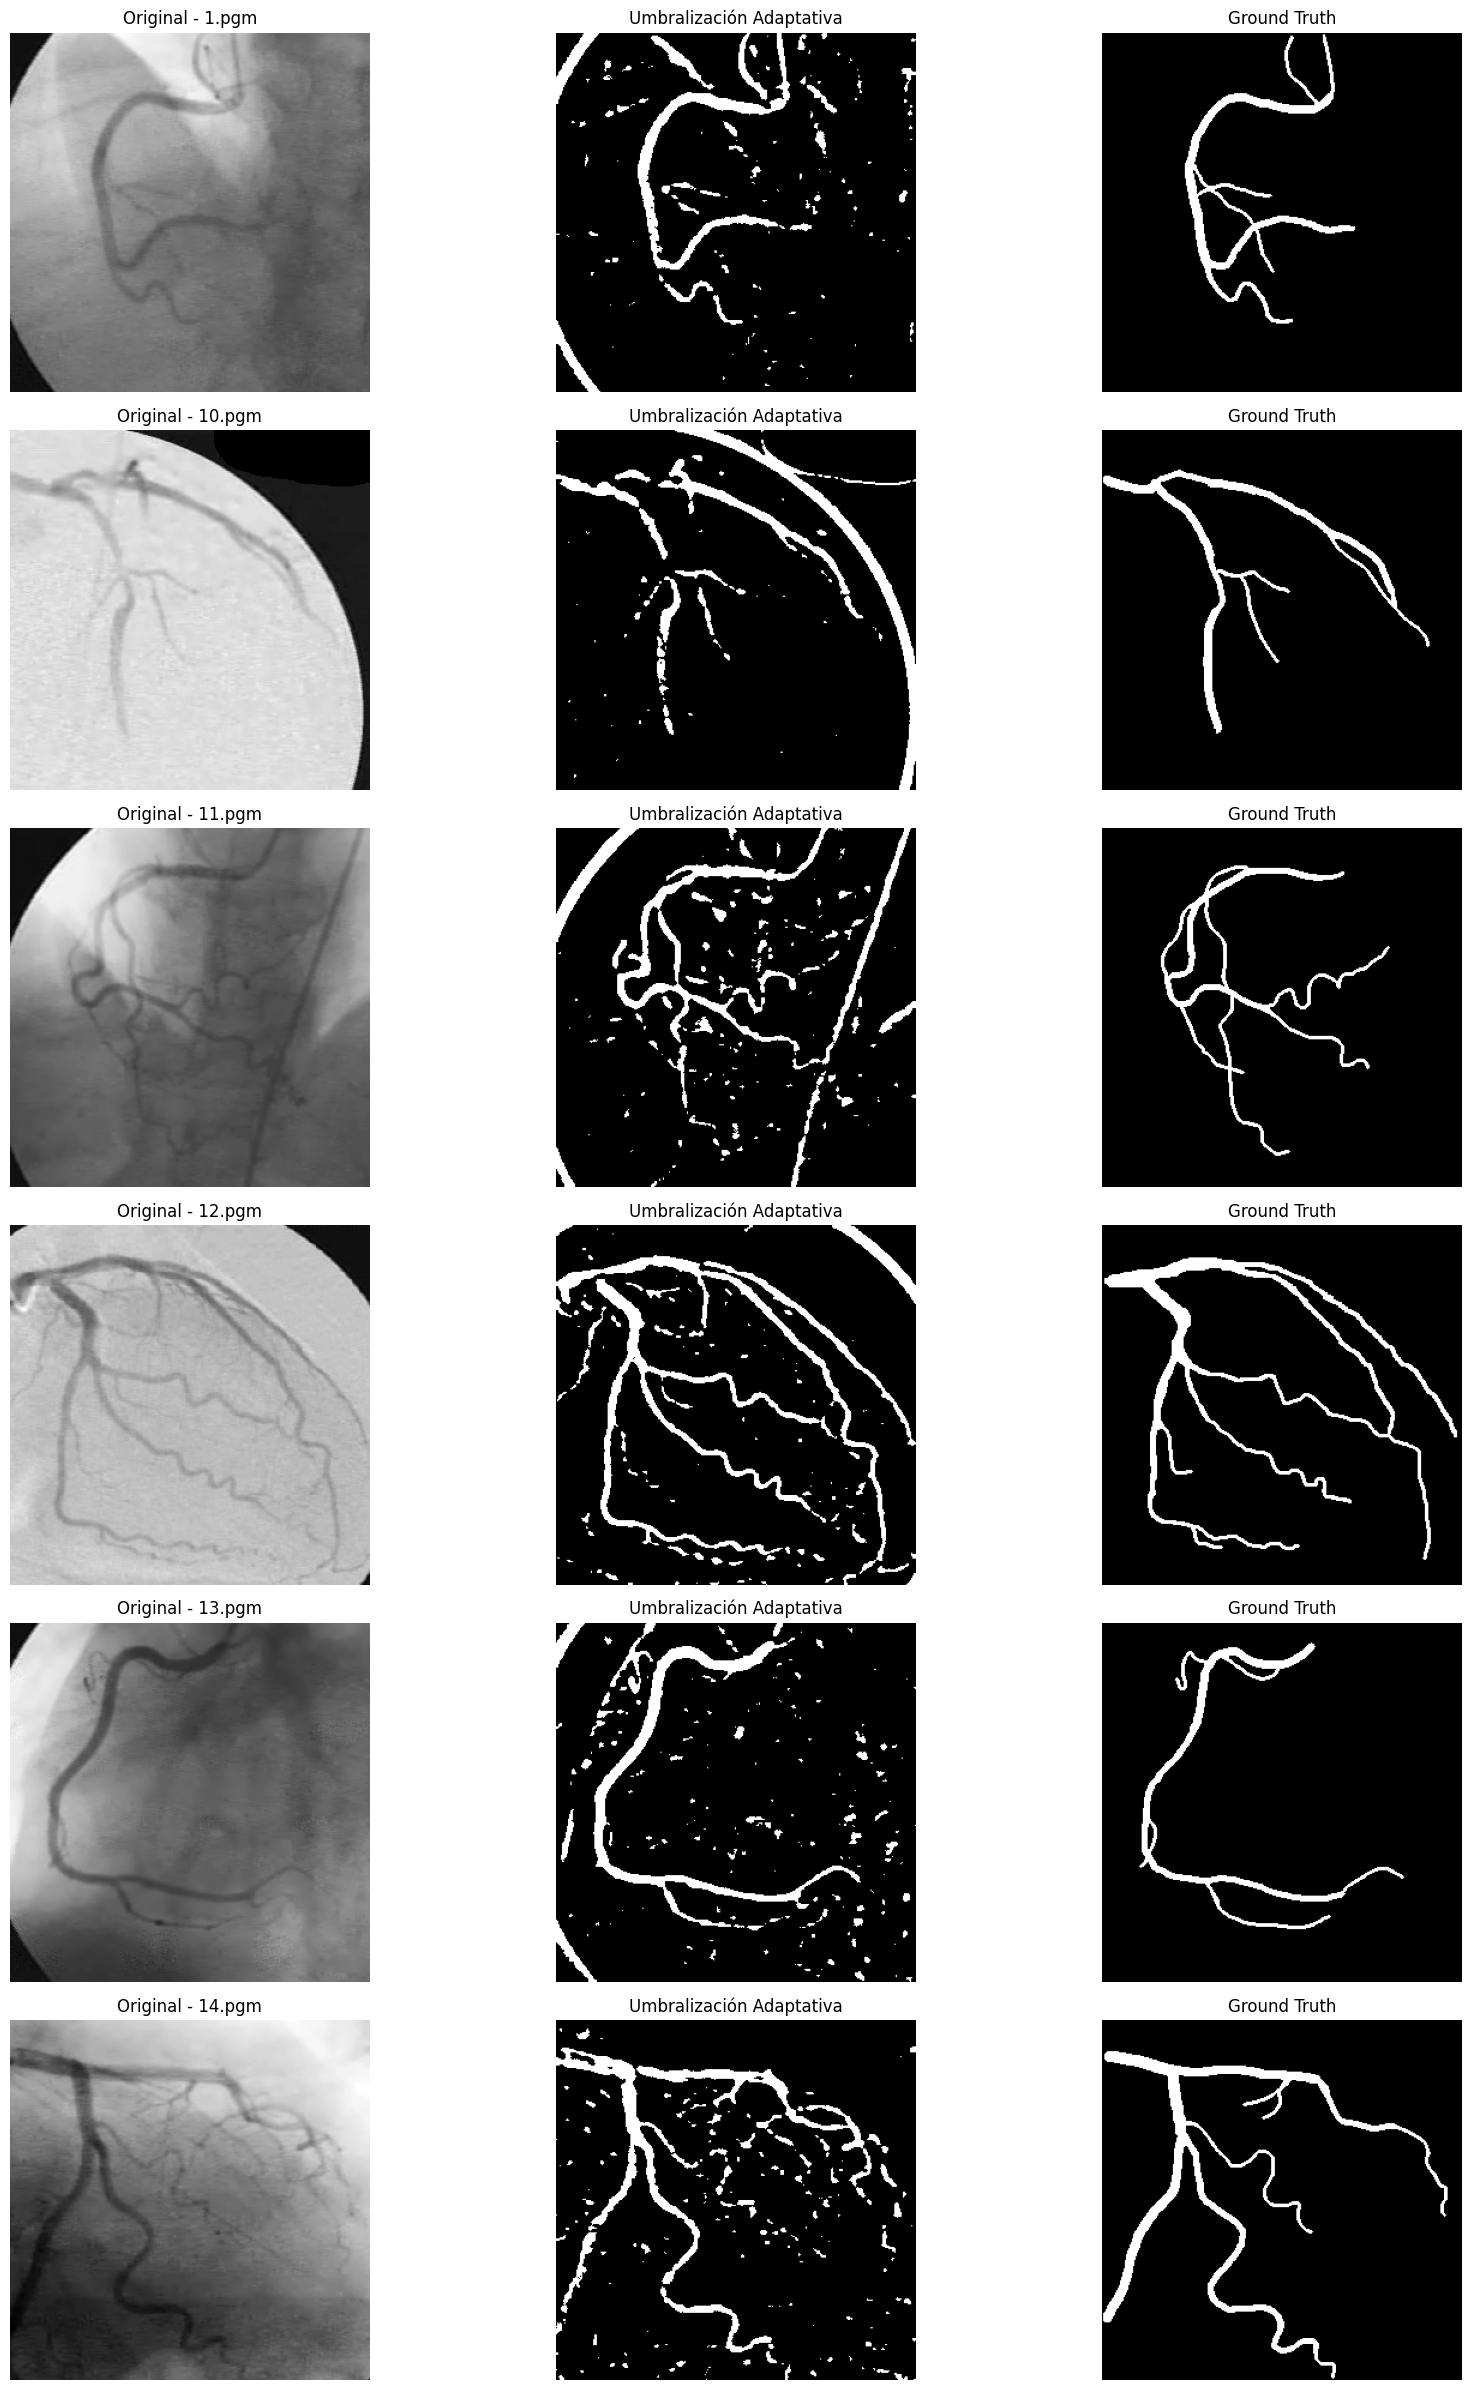

In [ ]:
num_display = min(6, len(resultadosVisuales))

plt.figure(figsize=(18, 4 * num_display))

for i in range(num_display):
    filename, orig, binarized, gt = resultadosVisuales[i]
    
    plt.subplot(num_display, 3, 3*i + 1)
    plt.imshow(orig, cmap='gray')
    plt.title(f"Original - {filename}")
    plt.axis('off')
    
    plt.subplot(num_display, 3, 3*i + 2)
    plt.imshow(binarized, cmap='gray')
    plt.title("Umbralización Adaptativa")
    plt.axis('off')
    
    plt.subplot(num_display, 3, 3*i + 3)
    plt.imshow(gt, cmap='gray')
    plt.title("Ground Truth")
    plt.axis('off')
    
plt.tight_layout()
plt.show()


In [ ]:
df = pd.DataFrame(resultados)
print(df)

promedios = df.mean(numeric_only=True)
print("\nPromedios de métricas en todas las imágenes:")
print(promedios)

    Imagen  Accuracy    Recall  Specificity  Precision  F1 Score
0    1.pgm  0.951833  0.808516     0.958118   0.458458  0.585128
1   10.pgm  0.936333  0.700355     0.947160   0.378146  0.491119
2   11.pgm  0.919867  0.750068     0.927067   0.303660  0.432305
3   12.pgm  0.936344  0.854500     0.943391   0.565125  0.680319
4   13.pgm  0.946844  0.887989     0.949283   0.420391  0.570634
5   14.pgm  0.940667  0.731617     0.956794   0.566418  0.638505
6   15.pgm  0.952078  0.906271     0.954442   0.506581  0.649890
7   16.pgm  0.926522  0.900060     0.928070   0.422583  0.575137
8   17.pgm  0.940578  0.673635     0.953988   0.423791  0.520273
9   18.pgm  0.931367  0.681446     0.944970   0.402645  0.506196
10  19.pgm  0.968289  0.761928     0.978317   0.630681  0.690119
11   2.pgm  0.940422  0.876883     0.943570   0.434960  0.581486
12  20.pgm  0.943411  0.912465     0.945775   0.562397  0.695886
13   3.pgm  0.949000  0.874668     0.952246   0.444414  0.589372
14   4.pgm  0.950989  0.5